In [1]:
# normalization
# sooooo many dense layers

# Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import lalsimulation as lal
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
import keras
import keras_metrics as km
import keras
import keras_metrics as km
from keras import metrics

2023-07-27 08:21:36.692204: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Functions

In [2]:
#min-max normalize any array to between -1 and 1

def minmax(inputarray):
    
    absinput = np.abs(inputarray)
    gmax = absinput.max()
    newarray = inputarray / gmax
                
    return newarray, gmax


In [3]:
#return gammas back to original values in order to plot EOS

def unnorm(gammaarray, gam0max, gam1max, gam2max, gam3max):
    
    for i in range (len(gammaarray)):
        new_gamma0_array = gammaarray[0] * gam0max
        new_gamma1_array = gammaarray[1] * gam1max
        new_gamma2_array = gammaarray[2] * gam2max
        new_gamma3_array = gammaarray[3] * gam3max
    
    #gamma_array =  np.array([[0] * 4 ])
    new_gamma_array = np.concatenate((new_gamma0_array, new_gamma1_array, new_gamma2_array, new_gamma3_array), axis=1)

#        #change these values 
#        new_gamma0_array = ((gammaarray - gammaarray[0].min())/(gammaarray[0].max() - gammaarray[0].min())) * (2.0 - 0.2) + 0.2
#        new_gamma1_array = ((gammaarray - gammaarray[1].min())/(gammaarray[1].max() - gammaarray[1].min())) * (1.7 - (-1.6)) + (-1.6)
#        new_gamma2_array = ((gammaarray - gammaarray[2].min())/(gammaarray[2].max() - gammaarray[2].min())) * (0.6 - (-0.6)) + (-0.6)
#        new_gamma3_array = ((gammaarray - gammaarray[3].min())/(gammaarray[3].max() - gammaarray[3].min())) * (0.02 - (-0.02)) + (-0.02)
        
#        new_gamma_array = np.concatenate((new_gamma0_array, new_gamma1_array, new_gamma2_array, new_gamma3_array), axis=1)
        
    return new_gamma_array
    

In [4]:
#formatting array & processing outputs

def format_output(data):
    gamma0 = data.pop('gamma0')
    gamma0 = np.array(gamma0)
    gamma1 = data.pop('gamma1')
    gamma1 = np.array(gamma1)
    gamma2 = data.pop('gamma2')
    gamma2 = np.array(gamma2)
    gamma3 = data.pop('gamma3')
    gamma3 = np.array(gamma3)
    return gamma0, gamma1, gamma2, gamma3


In [5]:
def whiten(df):
    
    df_new = pd.DataFrame()
    for k in df.keys():
        df_new[k] = (df[k]-np.mean(df[k])) / np.std(df[k])
    return df_new

    #return (x - train_stats['mean']) / train_stats['std']

#  MLA

In [6]:
#plt.hist(l2_dat)

In [2]:
#inputs

m1_dat = np.loadtxt("m1.dat.txt", dtype=float)
m2_dat = np.loadtxt("m2.dat.txt", dtype=float)
l1_dat = np.loadtxt("l1.dat.txt", dtype=float)
l2_dat = np.loadtxt("l2.dat.txt", dtype=float)

#outputs

sd_gamma0 = np.loadtxt("sd_gamma0.dat.txt", dtype=float)
sd_gamma1 = np.loadtxt("sd_gamma1.dat.txt", dtype=float)
sd_gamma2 = np.loadtxt("sd_gamma2.dat.txt", dtype=float)
sd_gamma3 = np.loadtxt("sd_gamma3.dat.txt", dtype=float)


In [ ]:
#normalize inputs

m1_dat, m1max = minmax(m1_dat)
m2_dat, m2max = minmax(m2_dat)
l1_dat, l1max = minmax(l1_dat)
l2_dat, l2max = minmax(l2_dat)


#normalize outputs

sd_gamma0, gam0max = minmax(sd_gamma0)
sd_gamma1, gam1max = minmax(sd_gamma1)
sd_gamma2, gam2max = minmax(sd_gamma2)
sd_gamma3, gam3max = minmax(sd_gamma3)


In [8]:
#create an empty array 8 x length(m1_dat]) for vals
array_size =  np.array([[0] * 8 ] * 350)
array_size = array_size.astype('float64')
combined_array = np.zeros_like(array_size)
print(combined_array.dtype)
print(combined_array.shape)

float64
(350, 8)


In [9]:
#reformat data files into this new array
for i in range(0,len(m1_dat)-1):
    combined_array[i][0] = m1_dat[i]
    combined_array[i][1] = m2_dat[i]
    combined_array[i][2] = l1_dat[i]
    combined_array[i][3] = l2_dat[i]
    combined_array[i][4] = sd_gamma0[i]
    combined_array[i][5] = sd_gamma1[i]
    combined_array[i][6] = sd_gamma2[i]
    combined_array[i][7] = sd_gamma3[i]
    

In [10]:
data = pd.DataFrame(combined_array)
data.columns = ['m1','m2', 'l1', 'l2','gamma0', 'gamma1', 'gamma2', 'gamma3']
print(data)

           m1        m2        l1        l2    gamma0    gamma1    gamma2  \
0    0.717538  0.363692  0.013429  0.814641  0.820405  0.320176 -0.440481   
1    0.558854  0.569898  0.022247  0.032739  0.430324  0.687011 -0.728764   
2    0.475342  0.484010  0.008347  0.012574  0.165517  0.514935 -0.263242   
3    0.455285  0.458225  0.072287  0.100665  0.638727  0.149387 -0.061682   
4    0.464837  0.380781  0.044604  0.182299  0.245643  0.721879 -0.557980   
..        ...       ...       ...       ...       ...       ...       ...   
345  0.546255  0.458512  0.075708  0.269867  0.829332  0.343503 -0.514537   
346  0.590013  0.578357  0.014832  0.032980  0.748993  0.198778 -0.295988   
347  0.621068  0.528903  0.006943  0.039433  0.721593  0.036351 -0.017251   
348  0.700514  0.786345  0.011813  0.009212  0.822482  0.312064 -0.446830   
349  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

       gamma3  
0    0.486877  
1    0.763537  
2    0.113366  
3   -0.0532

In [11]:
#split data into train and test

data = data.sample(frac=1).reset_index(drop=True)

train, test = train_test_split(data, test_size=0.2)

print(train)

train_stats = train.describe()

#get gamma as the outputs and format them as np arrays.

train_stats.pop('gamma0')
train_stats.pop('gamma1')
train_stats.pop('gamma2')
train_stats.pop('gamma3')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

           m1        m2        l1        l2    gamma0    gamma1    gamma2  \
249  0.755323  0.764376  0.008844  0.015010  0.998064  0.020140 -0.139894   
209  0.651915  0.372539  0.013206  0.569183  0.841190  0.145809 -0.252588   
277  0.553783  0.543716  0.005145  0.012675  0.529682  0.165606 -0.080562   
326  0.709783  0.640710  0.001086  0.007915  0.222576  0.726647 -0.548945   
297  0.506018  0.477107  0.030805  0.071987  0.653061  0.175111 -0.170421   
..        ...       ...       ...       ...       ...       ...       ...   
186  0.842311  0.671329  0.004625  0.034624  0.755858  0.318855 -0.305932   
65   0.395372  0.368170  0.366996  0.681155  0.876036  0.109607 -0.167785   
339  0.546255  0.458512  0.075708  0.269867  0.829332  0.343503 -0.514537   
232  0.441627  0.464281  0.072694  0.078236  0.313322  0.700557 -0.611458   
88   0.596748  0.574725  0.034869  0.070781  0.912151  0.157911 -0.326414   

       gamma3  
249  0.153288  
209  0.279538  
277  0.004963  
326  0.4212

In [12]:
#whitening
#norm_train_X = whiten(train)
#norm_test_X = whiten(test)

norm_train_X = train
norm_test_X = test

In [13]:
#normalizer = tf.keras.layers.Normalization(axis=-1)
#normalizer.adapt(train)

In [14]:
# build the model using the functional syntax

# output will be fed directly from the previous dense layer

act = 'tanh'

input_layer = Input(shape=(len(train .columns),))

#norm = normalizer(input_layer)

first_dense = Dense(units='128', activation=act)(input_layer)
second_dense = Dense(units='128', activation=act)(first_dense)
third_dense = Dense(units='128', activation=act)(second_dense)
fourth_dense = Dense(units='128', activation=act)(third_dense)
fifth_dense = Dense(units='128', activation=act)(fourth_dense)
sixth_dense = Dense(units='128', activation=act)(fifth_dense)
seventh_dense = Dense(units='128', activation=act)(sixth_dense)
eight_dense = Dense(units='128', activation=act)(seventh_dense)
ninth_dense = Dense(units='128', activation=act)(eight_dense)
    
tenth_dense = Dense(units='128', activation=act)(ninth_dense)
eleventh_dense = Dense(units='128', activation=act)(tenth_dense)
twelth_dense = Dense(units='128', activation=act)(eleventh_dense)
thirteenth_dense = Dense(units='128', activation=act)(twelth_dense)
fourteenth_dense = Dense(units='128', activation=act)(thirteenth_dense)
fifteenth_dense = Dense(units='128', activation=act)(fourteenth_dense)
sixteenth_dense = Dense(units='128', activation=act)(fifteenth_dense)
seventeenth_dense = Dense(units='128', activation=act)(sixteenth_dense)
eighteenth_dense = Dense(units='128', activation=act)(seventeenth_dense)
nineteenth_dense = Dense(units='128', activation=act)(eighteenth_dense)
    
twentieth_dense = Dense(units='128', activation=act)(nineteenth_dense)
tf_dense = Dense(units='128', activation=act)(twentieth_dense)
ts_dense = Dense(units='128', activation=act)(tf_dense)
tt_dense = Dense(units='128', activation=act)(ts_dense)
tfo_dense = Dense(units='128', activation=act)(tt_dense)
tfi_dense = Dense(units='128', activation=act)(tfo_dense)
ts_dense = Dense(units='128', activation=act)(tfi_dense)
tse_dense = Dense(units='128', activation=act)(ts_dense)
te_dense = Dense(units='128', activation=act)(tse_dense)
tn_dense = Dense(units='128', activation=act)(te_dense)


gamma0_output = Dense(units='1', activation=act, name='gamma0_output')(tn_dense)
thf_dense = Dense(units='64', activation=act)(tn_dense)

ths_dense = Dense(units='128', activation=act)(thf_dense)
tht_dense = Dense(units='128', activation=act)(ths_dense)
thfo_dense = Dense(units='128', activation=act)(tht_dense)
thfi_dense = Dense(units='128', activation=act)(thfo_dense)
ths_dense = Dense(units='128', activation=act)(thfi_dense)
thse_dense = Dense(units='128', activation=act)(ths_dense)
the_dense = Dense(units='128', activation=act)(thse_dense)
thn_dense = Dense(units='128', activation=act)(the_dense)

gamma1_output = Dense(units='1', activation=act, name='gamma1_output')(thn_dense)
fo_dense = Dense(units='32',activation=act)(thn_dense)

fof_dense = Dense(units='128', activation=act)(fo_dense)
fos_dense = Dense(units='128', activation=act)(fof_dense)
fot_dense = Dense(units='128', activation=act)(fos_dense)
fofo_dense = Dense(units='128', activation=act)(fot_dense)
fofi_dense = Dense(units='128', activation=act)(fofo_dense)

gamma2_output = Dense(units='1', activation=act, name='gamma2_output')(fofi_dense)
fos_dense = Dense(units='16',activation=act)(fofi_dense)

fose_dense = Dense(units='128', activation=act)(fos_dense)
foe_dense = Dense(units='128', activation=act)(fose_dense)
fon_dense = Dense(units='128', activation=act)(foe_dense)
fif_dense = Dense(units='128', activation=act)(fon_dense)

gamma3_output = Dense(units='1', activation=act, name='gamma3_output')(fon_dense)

model = Model(inputs=input_layer, outputs=[gamma0_output, gamma1_output, gamma2_output, gamma3_output])

print(model.summary())


2023-07-26 10:08:19.598854: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          640         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 128)          16512       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 128)          16512       ['dense_1[0][0]']                
                                                                                              

 dense_39 (Dense)               (None, 128)          4224        ['dense_38[0][0]']               
                                                                                                  
 dense_40 (Dense)               (None, 128)          16512       ['dense_39[0][0]']               
                                                                                                  
 dense_41 (Dense)               (None, 128)          16512       ['dense_40[0][0]']               
                                                                                                  
 dense_42 (Dense)               (None, 128)          16512       ['dense_41[0][0]']               
                                                                                                  
 dense_43 (Dense)               (None, 128)          16512       ['dense_42[0][0]']               
                                                                                                  
 dense_44 

In [15]:
#plot_model(model, to_file='V5_combinedmll.png', show_shapes=True, show_layer_names=True)

In [16]:
#specify the optimizer as stochastic gradient descent and will mention the learning rate as 0.001
#compile the model with loss functions for both outputs
from keras import metrics

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss={'gamma0_output': 'mse', 'gamma1_output': 'mse', 'gamma2_output': 'mse', 'gamma3_output': 'mse'},
              metrics={
                       'gamma0_output': tf.keras.metrics.MeanSquaredError() ,
                       'gamma1_output': tf.keras.metrics.MeanSquaredError(),
                       'gamma2_output': tf.keras.metrics.MeanSquaredError() ,
                       'gamma3_output': tf.keras.metrics.MeanSquaredError()
                      })


endmetric = "mean_squared_error"


In [21]:
#train the model for a number of epochs

numepochs = 200
    
history = model.fit(norm_train_X.to_numpy(), train_Y,
                    epochs=numepochs, batch_size=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=50,mode='auto')])

Epoch 1/200
23/23 [==============================] - 1s 41ms/step - loss: 0.2101 - gamma0_output_loss: 0.0329 - gamma1_output_loss: 0.0627 - gamma2_output_loss: 0.0544 - gamma3_output_loss: 0.0602 - gamma0_output_mean_squared_error: 0.0329 - gamma1_output_mean_squared_error: 0.0627 - gamma2_output_mean_squared_error: 0.0544 - gamma3_output_mean_squared_error: 0.0602 - val_loss: 0.2554 - val_gamma0_output_loss: 0.0398 - val_gamma1_output_loss: 0.0765 - val_gamma2_output_loss: 0.0660 - val_gamma3_output_loss: 0.0731 - val_gamma0_output_mean_squared_error: 0.0398 - val_gamma1_output_mean_squared_error: 0.0765 - val_gamma2_output_mean_squared_error: 0.0660 - val_gamma3_output_mean_squared_error: 0.0731
Epoch 2/200
23/23 [==============================] - 1s 26ms/step - loss: 0.2075 - gamma0_output_loss: 0.0322 - gamma1_output_loss: 0.0614 - gamma2_output_loss: 0.0539 - gamma3_output_loss: 0.0599 - gamma0_output_mean_squared_error: 0.0322 - gamma1_output_mean_squared_error: 0.0614 - gamma2_

Epoch 13/200
23/23 [==============================] - 0s 22ms/step - loss: 0.2067 - gamma0_output_loss: 0.0313 - gamma1_output_loss: 0.0614 - gamma2_output_loss: 0.0539 - gamma3_output_loss: 0.0601 - gamma0_output_mean_squared_error: 0.0313 - gamma1_output_mean_squared_error: 0.0614 - gamma2_output_mean_squared_error: 0.0539 - gamma3_output_mean_squared_error: 0.0601 - val_loss: 0.2928 - val_gamma0_output_loss: 0.0626 - val_gamma1_output_loss: 0.0908 - val_gamma2_output_loss: 0.0674 - val_gamma3_output_loss: 0.0720 - val_gamma0_output_mean_squared_error: 0.0626 - val_gamma1_output_mean_squared_error: 0.0908 - val_gamma2_output_mean_squared_error: 0.0674 - val_gamma3_output_mean_squared_error: 0.0720
Epoch 14/200
23/23 [==============================] - 1s 27ms/step - loss: 0.2063 - gamma0_output_loss: 0.0311 - gamma1_output_loss: 0.0613 - gamma2_output_loss: 0.0540 - gamma3_output_loss: 0.0599 - gamma0_output_mean_squared_error: 0.0311 - gamma1_output_mean_squared_error: 0.0613 - gamma

Epoch 25/200
23/23 [==============================] - 1s 39ms/step - loss: 0.2072 - gamma0_output_loss: 0.0316 - gamma1_output_loss: 0.0618 - gamma2_output_loss: 0.0541 - gamma3_output_loss: 0.0597 - gamma0_output_mean_squared_error: 0.0316 - gamma1_output_mean_squared_error: 0.0618 - gamma2_output_mean_squared_error: 0.0541 - gamma3_output_mean_squared_error: 0.0597 - val_loss: 0.2377 - val_gamma0_output_loss: 0.0356 - val_gamma1_output_loss: 0.0724 - val_gamma2_output_loss: 0.0612 - val_gamma3_output_loss: 0.0685 - val_gamma0_output_mean_squared_error: 0.0356 - val_gamma1_output_mean_squared_error: 0.0724 - val_gamma2_output_mean_squared_error: 0.0612 - val_gamma3_output_mean_squared_error: 0.0685
Epoch 26/200
23/23 [==============================] - 1s 32ms/step - loss: 0.2102 - gamma0_output_loss: 0.0322 - gamma1_output_loss: 0.0632 - gamma2_output_loss: 0.0545 - gamma3_output_loss: 0.0603 - gamma0_output_mean_squared_error: 0.0322 - gamma1_output_mean_squared_error: 0.0632 - gamma

Epoch 37/200
23/23 [==============================] - 1s 29ms/step - loss: 0.2077 - gamma0_output_loss: 0.0319 - gamma1_output_loss: 0.0620 - gamma2_output_loss: 0.0541 - gamma3_output_loss: 0.0596 - gamma0_output_mean_squared_error: 0.0319 - gamma1_output_mean_squared_error: 0.0620 - gamma2_output_mean_squared_error: 0.0541 - gamma3_output_mean_squared_error: 0.0596 - val_loss: 0.2364 - val_gamma0_output_loss: 0.0341 - val_gamma1_output_loss: 0.0691 - val_gamma2_output_loss: 0.0624 - val_gamma3_output_loss: 0.0708 - val_gamma0_output_mean_squared_error: 0.0341 - val_gamma1_output_mean_squared_error: 0.0691 - val_gamma2_output_mean_squared_error: 0.0624 - val_gamma3_output_mean_squared_error: 0.0708
Epoch 38/200
23/23 [==============================] - 1s 32ms/step - loss: 0.2069 - gamma0_output_loss: 0.0306 - gamma1_output_loss: 0.0622 - gamma2_output_loss: 0.0542 - gamma3_output_loss: 0.0599 - gamma0_output_mean_squared_error: 0.0306 - gamma1_output_mean_squared_error: 0.0622 - gamma

Epoch 49/200
23/23 [==============================] - 1s 27ms/step - loss: 0.2084 - gamma0_output_loss: 0.0312 - gamma1_output_loss: 0.0627 - gamma2_output_loss: 0.0543 - gamma3_output_loss: 0.0601 - gamma0_output_mean_squared_error: 0.0312 - gamma1_output_mean_squared_error: 0.0627 - gamma2_output_mean_squared_error: 0.0543 - gamma3_output_mean_squared_error: 0.0601 - val_loss: 0.2895 - val_gamma0_output_loss: 0.0589 - val_gamma1_output_loss: 0.0913 - val_gamma2_output_loss: 0.0683 - val_gamma3_output_loss: 0.0710 - val_gamma0_output_mean_squared_error: 0.0589 - val_gamma1_output_mean_squared_error: 0.0913 - val_gamma2_output_mean_squared_error: 0.0683 - val_gamma3_output_mean_squared_error: 0.0710
Epoch 50/200
23/23 [==============================] - 1s 25ms/step - loss: 0.2081 - gamma0_output_loss: 0.0315 - gamma1_output_loss: 0.0619 - gamma2_output_loss: 0.0545 - gamma3_output_loss: 0.0603 - gamma0_output_mean_squared_error: 0.0315 - gamma1_output_mean_squared_error: 0.0619 - gamma

Epoch 61/200
23/23 [==============================] - 0s 17ms/step - loss: 0.2032 - gamma0_output_loss: 0.0307 - gamma1_output_loss: 0.0612 - gamma2_output_loss: 0.0530 - gamma3_output_loss: 0.0584 - gamma0_output_mean_squared_error: 0.0307 - gamma1_output_mean_squared_error: 0.0612 - gamma2_output_mean_squared_error: 0.0530 - gamma3_output_mean_squared_error: 0.0584 - val_loss: 0.2432 - val_gamma0_output_loss: 0.0420 - val_gamma1_output_loss: 0.0713 - val_gamma2_output_loss: 0.0615 - val_gamma3_output_loss: 0.0684 - val_gamma0_output_mean_squared_error: 0.0420 - val_gamma1_output_mean_squared_error: 0.0713 - val_gamma2_output_mean_squared_error: 0.0615 - val_gamma3_output_mean_squared_error: 0.0684
Epoch 62/200
23/23 [==============================] - 0s 16ms/step - loss: 0.2093 - gamma0_output_loss: 0.0318 - gamma1_output_loss: 0.0625 - gamma2_output_loss: 0.0546 - gamma3_output_loss: 0.0604 - gamma0_output_mean_squared_error: 0.0318 - gamma1_output_mean_squared_error: 0.0625 - gamma

Epoch 73/200
23/23 [==============================] - 0s 15ms/step - loss: 0.2047 - gamma0_output_loss: 0.0303 - gamma1_output_loss: 0.0611 - gamma2_output_loss: 0.0537 - gamma3_output_loss: 0.0597 - gamma0_output_mean_squared_error: 0.0303 - gamma1_output_mean_squared_error: 0.0611 - gamma2_output_mean_squared_error: 0.0537 - gamma3_output_mean_squared_error: 0.0597 - val_loss: 0.2593 - val_gamma0_output_loss: 0.0377 - val_gamma1_output_loss: 0.0820 - val_gamma2_output_loss: 0.0671 - val_gamma3_output_loss: 0.0725 - val_gamma0_output_mean_squared_error: 0.0377 - val_gamma1_output_mean_squared_error: 0.0820 - val_gamma2_output_mean_squared_error: 0.0671 - val_gamma3_output_mean_squared_error: 0.0725
Epoch 74/200
23/23 [==============================] - 0s 18ms/step - loss: 0.2022 - gamma0_output_loss: 0.0299 - gamma1_output_loss: 0.0607 - gamma2_output_loss: 0.0527 - gamma3_output_loss: 0.0589 - gamma0_output_mean_squared_error: 0.0299 - gamma1_output_mean_squared_error: 0.0607 - gamma

Epoch 85/200
23/23 [==============================] - 0s 16ms/step - loss: 0.2047 - gamma0_output_loss: 0.0318 - gamma1_output_loss: 0.0620 - gamma2_output_loss: 0.0530 - gamma3_output_loss: 0.0579 - gamma0_output_mean_squared_error: 0.0318 - gamma1_output_mean_squared_error: 0.0620 - gamma2_output_mean_squared_error: 0.0530 - gamma3_output_mean_squared_error: 0.0579 - val_loss: 0.2417 - val_gamma0_output_loss: 0.0312 - val_gamma1_output_loss: 0.0709 - val_gamma2_output_loss: 0.0655 - val_gamma3_output_loss: 0.0741 - val_gamma0_output_mean_squared_error: 0.0312 - val_gamma1_output_mean_squared_error: 0.0709 - val_gamma2_output_mean_squared_error: 0.0655 - val_gamma3_output_mean_squared_error: 0.0741
Epoch 86/200
23/23 [==============================] - 0s 17ms/step - loss: 0.2026 - gamma0_output_loss: 0.0286 - gamma1_output_loss: 0.0599 - gamma2_output_loss: 0.0539 - gamma3_output_loss: 0.0602 - gamma0_output_mean_squared_error: 0.0286 - gamma1_output_mean_squared_error: 0.0599 - gamma

Epoch 97/200
23/23 [==============================] - 0s 15ms/step - loss: 0.2014 - gamma0_output_loss: 0.0280 - gamma1_output_loss: 0.0600 - gamma2_output_loss: 0.0535 - gamma3_output_loss: 0.0599 - gamma0_output_mean_squared_error: 0.0280 - gamma1_output_mean_squared_error: 0.0600 - gamma2_output_mean_squared_error: 0.0535 - gamma3_output_mean_squared_error: 0.0599 - val_loss: 0.3018 - val_gamma0_output_loss: 0.0671 - val_gamma1_output_loss: 0.0934 - val_gamma2_output_loss: 0.0697 - val_gamma3_output_loss: 0.0717 - val_gamma0_output_mean_squared_error: 0.0671 - val_gamma1_output_mean_squared_error: 0.0934 - val_gamma2_output_mean_squared_error: 0.0697 - val_gamma3_output_mean_squared_error: 0.0717
Epoch 98/200
23/23 [==============================] - 0s 20ms/step - loss: 0.2034 - gamma0_output_loss: 0.0302 - gamma1_output_loss: 0.0607 - gamma2_output_loss: 0.0534 - gamma3_output_loss: 0.0590 - gamma0_output_mean_squared_error: 0.0302 - gamma1_output_mean_squared_error: 0.0607 - gamma

Epoch 109/200
23/23 [==============================] - 0s 18ms/step - loss: 0.2041 - gamma0_output_loss: 0.0304 - gamma1_output_loss: 0.0613 - gamma2_output_loss: 0.0535 - gamma3_output_loss: 0.0589 - gamma0_output_mean_squared_error: 0.0304 - gamma1_output_mean_squared_error: 0.0613 - gamma2_output_mean_squared_error: 0.0535 - gamma3_output_mean_squared_error: 0.0589 - val_loss: 0.2594 - val_gamma0_output_loss: 0.0427 - val_gamma1_output_loss: 0.0791 - val_gamma2_output_loss: 0.0656 - val_gamma3_output_loss: 0.0720 - val_gamma0_output_mean_squared_error: 0.0427 - val_gamma1_output_mean_squared_error: 0.0791 - val_gamma2_output_mean_squared_error: 0.0656 - val_gamma3_output_mean_squared_error: 0.0720
Epoch 110/200
23/23 [==============================] - 0s 12ms/step - loss: 0.2003 - gamma0_output_loss: 0.0284 - gamma1_output_loss: 0.0595 - gamma2_output_loss: 0.0532 - gamma3_output_loss: 0.0592 - gamma0_output_mean_squared_error: 0.0284 - gamma1_output_mean_squared_error: 0.0595 - gam

In [22]:
loss, gamma0_loss, gamma0_accuracy, gamma1_loss, gamma1_accuracy, gamma2_loss, gamma2_accuracy, gamma3_loss, gamma3_accuracy = model.evaluate(x=norm_test_X.to_numpy(), y=test_Y)

3/3 [==============================] - 0s 7ms/step - loss: 0.2949 - gamma0_output_loss: 0.0454 - gamma1_output_loss: 0.0945 - gamma2_output_loss: 0.0767 - gamma3_output_loss: 0.0783 - gamma0_output_mean_squared_error: 0.0454 - gamma1_output_mean_squared_error: 0.0945 - gamma2_output_mean_squared_error: 0.0767 - gamma3_output_mean_squared_error: 0.0783


In [23]:
#predictions = model.predict(norm_test_X.to_numpy())

new_predictions = model.predict(norm_train_X.to_numpy())
predictions = unnorm(new_predictions, gam0max, gam1max, gam2max, gam3max)


9/9 [==============================] - 0s 5ms/step


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


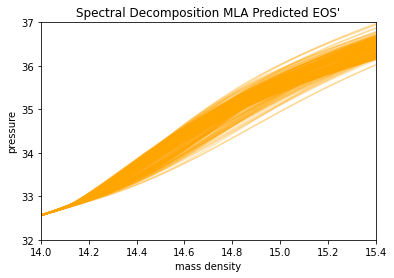

There were 0 bad samples.


In [24]:
count = 0
numbad = 0

for i in range(len(sd_gamma0)):
    
    count +=1 
    
     
    gam0 = float(predictions[i][0])
    gam1 = float(predictions[i][1])
    gam2 = float(predictions[i][2])
    gam3 = float(predictions[i][3])
    
    ipred_EOS = lal.SimNeutronStarEOS4ParameterSpectralDecomposition(gam0,gam1,gam2,gam3)
    
        #ipred_h = np.linspace(0.0001,lal.SimNeutronStarEOSMaxPseudoEnthalpy(ipred_EOS),1000)

    ipred_hmin = 0.0001
    ipred_hmax = lal.SimNeutronStarEOSMaxPseudoEnthalpy(ipred_EOS)
    
    ipred_loghmin = np.log10(ipred_hmin)
    ipred_loghmax = np.log10(ipred_hmax)

    ipred_rho = []
    ipred_p = []

    for k in range(1000):
    
        ipred_h = np.linspace(0.0001,lal.SimNeutronStarEOSMaxPseudoEnthalpy(ipred_EOS),1000)
        ipred_rho.append(lal.SimNeutronStarEOSRestMassDensityOfPseudoEnthalpy(ipred_h[k],ipred_EOS)*.001)
        ipred_p.append(lal.SimNeutronStarEOSPressureOfPseudoEnthalpy(ipred_h[k],ipred_EOS)*10)
        
        
    ipred_rho = np.array(ipred_rho)
    ipred_p = np.array(ipred_p)

    plt.plot(np.log10(ipred_rho),np.log10(ipred_p),alpha=0.25,color='orange')
        
    plt.xlabel("mass density")
    plt.ylabel("pressure")
        
    print(count)
        
    #except:
        #print(count, " no good")
        #numbad += 1

plt.title("Spectral Decomposition MLA Predicted EOS'")
plt.xlim([14,15.4])
plt.ylim([32,37])
plt.xlabel("mass density")
plt.ylabel("pressure")
plt.show() 

print("There were", numbad, "bad samples.")

# Loss

In [27]:
history.history.keys() 

dict_keys(['loss', 'gamma0_output_loss', 'gamma1_output_loss', 'gamma2_output_loss', 'gamma3_output_loss', 'gamma0_output_mean_squared_error', 'gamma1_output_mean_squared_error', 'gamma2_output_mean_squared_error', 'gamma3_output_mean_squared_error', 'val_loss', 'val_gamma0_output_loss', 'val_gamma1_output_loss', 'val_gamma2_output_loss', 'val_gamma3_output_loss', 'val_gamma0_output_mean_squared_error', 'val_gamma1_output_mean_squared_error', 'val_gamma2_output_mean_squared_error', 'val_gamma3_output_mean_squared_error'])

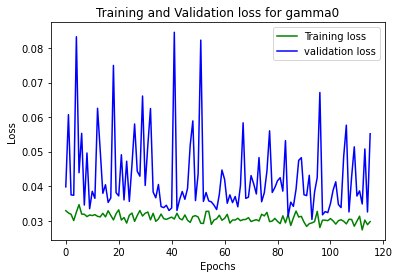

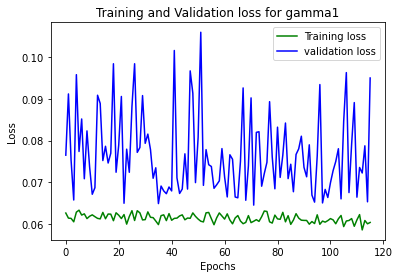

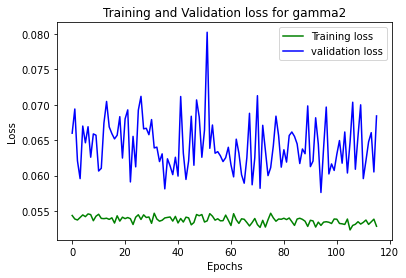

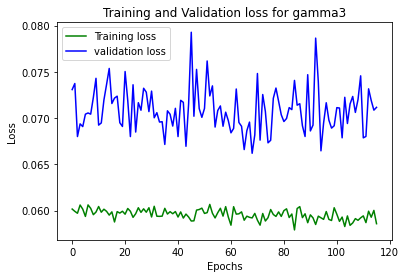

In [28]:
#loss for gamma0 values
loss_train = history.history['gamma0_output_loss']
loss_val = history.history['val_gamma0_output_loss']
epochs = range(0,116)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for gamma0')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#loss for gamma1 values
loss_train = history.history['gamma1_output_loss']
loss_val = history.history['val_gamma1_output_loss']
epochs = range(0,116)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for gamma1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#loss for gamma2 values
loss_train = history.history['gamma2_output_loss']
loss_val = history.history['val_gamma2_output_loss']
epochs = range(0,116)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for gamma2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#loss for gamma3 values
loss_train = history.history['gamma3_output_loss']
loss_val = history.history['val_gamma3_output_loss']
epochs = range(0,116)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for gamma3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Metric

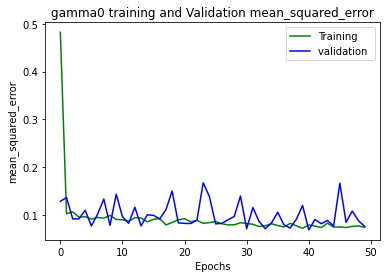

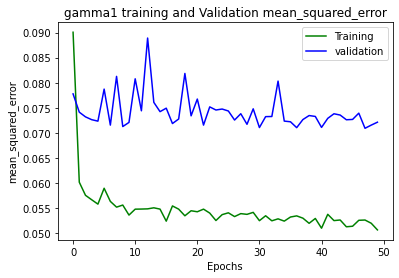

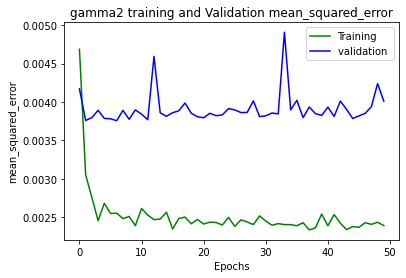

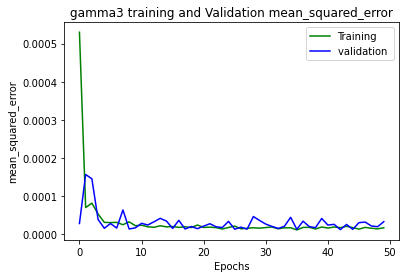

In [42]:
val = 'val_'
gam0out = 'gamma0_output_'
gam1out = 'gamma1_output_'
gam2out = 'gamma2_output_'
gam3out = 'gamma3_output_'

ac_train = history.history[gam0out + endmetric]
ac_val = history.history[val + gam0out + endmetric]
plt.plot(ac_train, 'g', label='Training')
plt.plot(ac_val, 'b', label='validation ')
plt.title('gamma0 training and Validation ' + endmetric)
plt.xlabel('Epochs')
plt.ylabel(endmetric)
plt.legend()
plt.show()



ac_train = history.history[gam1out + endmetric]
ac_val = history.history[val + gam1out + endmetric]
plt.plot(ac_train, 'g', label='Training')
plt.plot(ac_val, 'b', label='validation')
plt.title('gamma1 training and Validation ' + endmetric)
plt.xlabel('Epochs')
plt.ylabel(endmetric)
plt.legend()
plt.show()

ac_train = history.history[gam2out + endmetric]
ac_val = history.history[val + gam2out + endmetric]
plt.plot(ac_train, 'g', label='Training ',)
plt.plot(ac_val, 'b', label='validation ')
plt.title('gamma2 training and Validation ' + endmetric)
plt.xlabel('Epochs')
plt.ylabel(endmetric)
plt.legend()
plt.show()

ac_train = history.history[gam3out + endmetric]
ac_val = history.history[val + gam3out + endmetric]
plt.plot(ac_train, 'g', label='Training ')
plt.plot(ac_val, 'b', label='validation ')
plt.title('gamma3 training and Validation ' + endmetric)
plt.xlabel('Epochs')
plt.ylabel(endmetric)
plt.legend()
plt.show()